In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/titanic/train.csv')

In [3]:
df.head()
# Pclass: 선승 등급
# Sib Sp: 동승자 정보(배우자,형제,자매 등)
# Parch: 부모나 자식 동반 여부
# Cabin: 선실번호
# Embarked : 중간정착소

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [6]:
df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique())

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 전처리
# Passengerid =>삭제
# Pclass => 사용
# Name => 삭제
# Sex => 사용
# Age => 사용
# SibSp,Parch => 사용
# ticket => 삭제
# Fare -> 사용
# Cabin => 삭제
# Embarked => 사용
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
# 2. NaN 값 처리(Age.Embarked)
# Age 컬럼 처리(평균값으로 채워 넣기)
df.Age.fillna(df.Age.mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# Embarked 칼럼 처리(최빈값으로 채워 넣기) (혹은 중간에 정착을 안했으니 Null값을 나타내는 다른 값을 적음)
# 최빈값 확인
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.Embarked.fillna('S', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
# 3. 문자열 피쳐를 숫자로 전환(인코딩)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
# Sex: labelEncoding
# Embarked: One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

In [18]:
# Sex 칼럽 LabelEncoding
le = LabelEncoder()
le.fit(df.Sex)
df.Sex = le.transform(df.Sex)
#fit()과 transform()은 fit_transform() 함수로 한번에 수행 가능

In [19]:
# Embarked One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df.Embarked.values.reshape(-1,1))

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [20]:
#원핫인고딩 시에는 sklearn.preprocessing import OneHotEnocoder 대신에 pandas.get_dummies() 함수 활용 추천
embarked_ohe = pd.get_dummies(df.Embarked)

In [21]:
# 데이터 합치기
df = pd.concat([df,embarked_ohe],axis=1)

In [22]:
# Embarked 칼럼 삭제
df.drop('Embarked', axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 48.0 KB


In [24]:
# Age를 이용해서 Age_group 생성
# 0-5(Baby), 6-12(Chid), 13-18(Teenager), 19-25(Student), 26-35(Young Adult), 36-60(Adult), 61~(Elderly)

# np.digitize()함수 활용
import numpy as np
sr = pd.Series([5,15,23,31,28])
np.digitize(sr,[10,20,30])
# 10미만이면 0, 10~19: 1, 20~29: 2, 30~:3

array([0, 1, 2, 3, 2], dtype=int64)

In [25]:
# Age_group 생성
df['Age_group']= np.digitize(df.Age,[6,13,19,26,36,61])

In [26]:
# Age 칼럼 제거
df.drop('Age',axis=1,inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S,Age_group
0,0,3,1,1,0,7.2500,0,0,1,3
1,1,1,0,1,0,71.2833,1,0,0,5
2,1,3,0,0,0,7.9250,0,0,1,4
3,1,1,0,1,0,53.1000,0,0,1,4
4,0,3,1,0,0,8.0500,0,0,1,4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   C          891 non-null    uint8  
 7   Q          891 non-null    uint8  
 8   S          891 non-null    uint8  
 9   Age_group  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5), uint8(3)
memory usage: 48.0 KB


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [30]:
# 데이터 분리
X = df.drop('Survived', axis=1)
y =df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
#결정트리 생성
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9476047904191617
0.757847533632287


In [32]:
#GridSearchCV활용
params = {
    'max_depth' : [3,5,7],
    'min_samples_split' : [5,10,15]
}
grid_dt = GridSearchCV(dt, param_grid=params, cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 15]})

In [33]:
print(grid_dt.score(X_train,y_train))
print(grid_dt.score(X_test,y_test))

0.8413173652694611
0.8071748878923767


In [34]:
# best parameter
grid_dt.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [35]:
# feature 중요도
grid_dt.best_estimator_.feature_importances_

array([0.13786064, 0.62519738, 0.05215611, 0.        , 0.08061758,
       0.00442223, 0.02245451, 0.01009181, 0.06719975])

In [36]:
f_imp = pd.DataFrame({
    'feature': X.columns,
    'importance' : grid_dt.best_estimator_.feature_importances_
})

<AxesSubplot:ylabel='feature'>

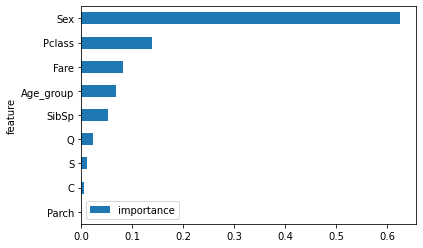

In [37]:
#시각화
f_imp.sort_values(by='importance').plot(kind='barh',x='feature', y='importance')

In [38]:
#결정트리 시각화
# conda install pythongraphviz

In [39]:
import graphviz
from sklearn import tree

In [40]:
# 시각화를 위해 간단한 결정트리 생성
dt1 = DecisionTreeClassifier(max_depth =3)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
data = tree.export_graphviz(dt1)

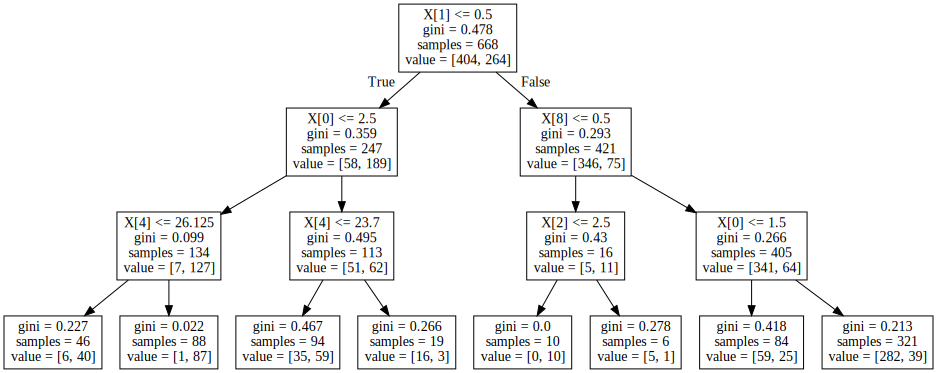

In [42]:
graph = graphviz.Source(data)
graph

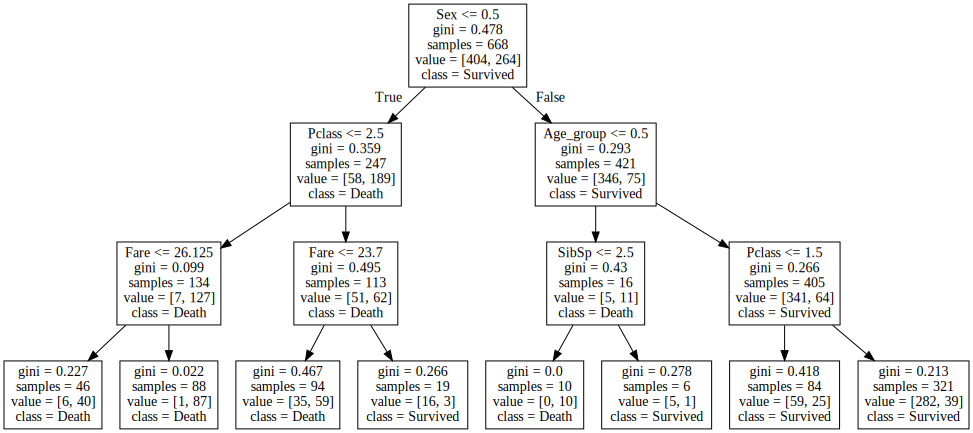

In [43]:
# 해석 어려우니 다음과 같이 해서 쉽게 알 수 있도록 나타냄
data = tree.export_graphviz(dt1, feature_names = X.columns, class_names=['Survived','Death'])
graph1 = graphviz.Source(data)
graph1

In [44]:
# 파일로 빼내기
graph1.render('titanic_prediction')

'titanic_prediction.pdf'